In [169]:
library(patchwork)
library(ggplot2)
library(magick)
library(tidytext)
library(SingleCellExperiment)
library(tidyHeatmap)
library(dplyr)
library(tidyr)
library(plotgardener)
library(ggplot2)
library(ggrepel)
library(gridExtra)
source('./ABCA7lof2/plotting.r')

In [170]:
cols = c('grey', 'red')
names(cols) = c('Con', 'LoF')
colors = readRDS('./processed_data//Cell_group_colors.rds')

<u>**Figure 1**</u>
<a name="F1"></a>

In [ ]:
### make M-R more visible
### order S

In [4]:
colData = read.csv('./processed_data/single_cell/colData.csv')
coords = colData[,c('x', 'y', 'ABCA7LoF', 'projid', 'leiden_clusters', 'annotations2', 'gaussian_liklihood')]
coords$ABCA7LoF = ifelse(coords$ABCA7LoF==1, 'LoF', 'Con')

coords = read.csv('../ABCA7lof//processed_data//for_plotting/umap_coords.csv', row.names=1)


In [6]:
# sce = readRDS('./processed_data/single_cell/sce.rds')
# coords$ABCA7 = logcounts(sce)['ABCA7',]

In [7]:
# plot cartoon
abca7_gene = image_ggplot(image_read('../ABCA7lof/svgs/abca7_gene.png'))
cohort_cartoon = image_ggplot(image_trim(image_read('../ABCA7lof/svgs/cohort_cartoon.png')))

In [8]:
abca7_expression = plot_coords_by_gene(coords, 'x', 'y', 'ABCA7', 'node_centrality', low='white', high='red')

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


In [9]:
# plot cells
size=4
cells_plot = plot_coords_by_grp(coords, 'x', 'y', 'celltype', 'node_centrality', colors)+annotate(geom="text", x=-2, y=13, label="Excitatory Neurons",color=colors['Ex'], size=size, fontface='italic')+
annotate(geom="text", x=9, y=-1, label="Oligodendrocytes",color=colors['Oli'], size=size, fontface='italic')+
annotate(geom="text", x=7, y=-14, label="Astrocytes",color=colors['Ast'], size=size, fontface='italic')+
annotate(geom="text", x=4, y=10, label="Inhibitory Neurons",color=colors['In'], size=size, fontface='italic')+
annotate(geom="text", x=12, y=3, label="Microglia",color=colors['Mic'], size=size, fontface='italic')+
annotate(geom="text", x=2, y=-5, label="OPCs",color=colors['Opc'], size=size, fontface='italic')+
annotate(geom="text", x=-7, y=-11, label="Vascular Cells",color=colors['Endo'], size=size, fontface='italic')

In [10]:
# plot LoF
size=4
coords$LoF = ifelse(coords$LoF=='LOF', 'LoF', 'Con')
lof_plot = plot_coords_by_grp(coords, 'x', 'y', 'LoF', 'node_centrality', cols)#+annotate(geom="text", x=-2, y=13, label="Excitatory Neurons",color=colors['Ex'], size=size, fontface='italic')

In [104]:
ex_u = image_ggplot(image_border(((image_read_pdf('./pdf_figures/Exumap.pdf'))),  "black", "10x10"))
in_u = image_ggplot(image_border(((image_read_pdf('./pdf_figures/Inumap.pdf'))),  "black", "10x10"))
ast_u = image_ggplot(image_border(((image_read_pdf('./pdf_figures/Astumap.pdf'))),  "black", "10x10"))
mic_u = image_ggplot(image_border(((image_read_pdf('./pdf_figures/Micumap.pdf'))),  "black", "10x10"))
oli_u = image_ggplot(image_border(((image_read_pdf('./pdf_figures/Oliumap.pdf'))),  "black", "10x10"))
opc_u = image_ggplot(image_border(((image_read_pdf('./pdf_figures/Opcumap.pdf'))),  "black", "10x10"))
overview = image_ggplot(image_trim(image_read_pdf('./pdf_figures/cluster_overview.pdf')))
overview1 = image_ggplot(image_trim(image_read_pdf('./pdf_figures//umap_exp_overview.pdf')))

In [105]:
ex_uc = image_ggplot(image_border(((image_read_pdf('./pdf_figures/Exumap_clust.pdf'))),  "black", "10x10"))
in_uc = image_ggplot(image_border(((image_read_pdf('./pdf_figures/Inumap_clust.pdf'))),  "black", "10x10"))
ast_uc = image_ggplot(image_border(((image_read_pdf('./pdf_figures/Astumap_clust.pdf'))),  "black", "10x10"))
mic_uc = image_ggplot(image_border(((image_read_pdf('./pdf_figures/Micumap_clust.pdf'))),  "black", "10x10"))
oli_uc = image_ggplot(image_border(((image_read_pdf('./pdf_figures/Oliumap_clust.pdf'))),  "black", "10x10"))
opc_uc = image_ggplot(image_border(((image_read_pdf('./pdf_figures/Opcumap_clust.pdf'))),  "black", "10x10"))

In [111]:
legend = image_ggplot((image_read('./pdf_figures/legend.png')))

In [106]:
ex_b = image_ggplot((image_read_pdf('./pdf_figures/cluster_barsEx.pdf')))
in_b = image_ggplot((image_read_pdf('./pdf_figures/cluster_barsIn.pdf')))
ast_b = image_ggplot((image_read_pdf('./pdf_figures/cluster_barsAst.pdf')))
mic_b = image_ggplot((image_read_pdf('./pdf_figures/cluster_barsMic.pdf')))
oli_b = image_ggplot((image_read_pdf('./pdf_figures/cluster_barsOli.pdf')))
opc_b = image_ggplot((image_read_pdf('./pdf_figures/cluster_barsOpc.pdf')))

In [144]:
row3 = (ex_uc | in_uc) / (ast_uc | mic_uc) / (oli_uc | opc_uc)


In [156]:
.*18

[1] 9

png 
  2

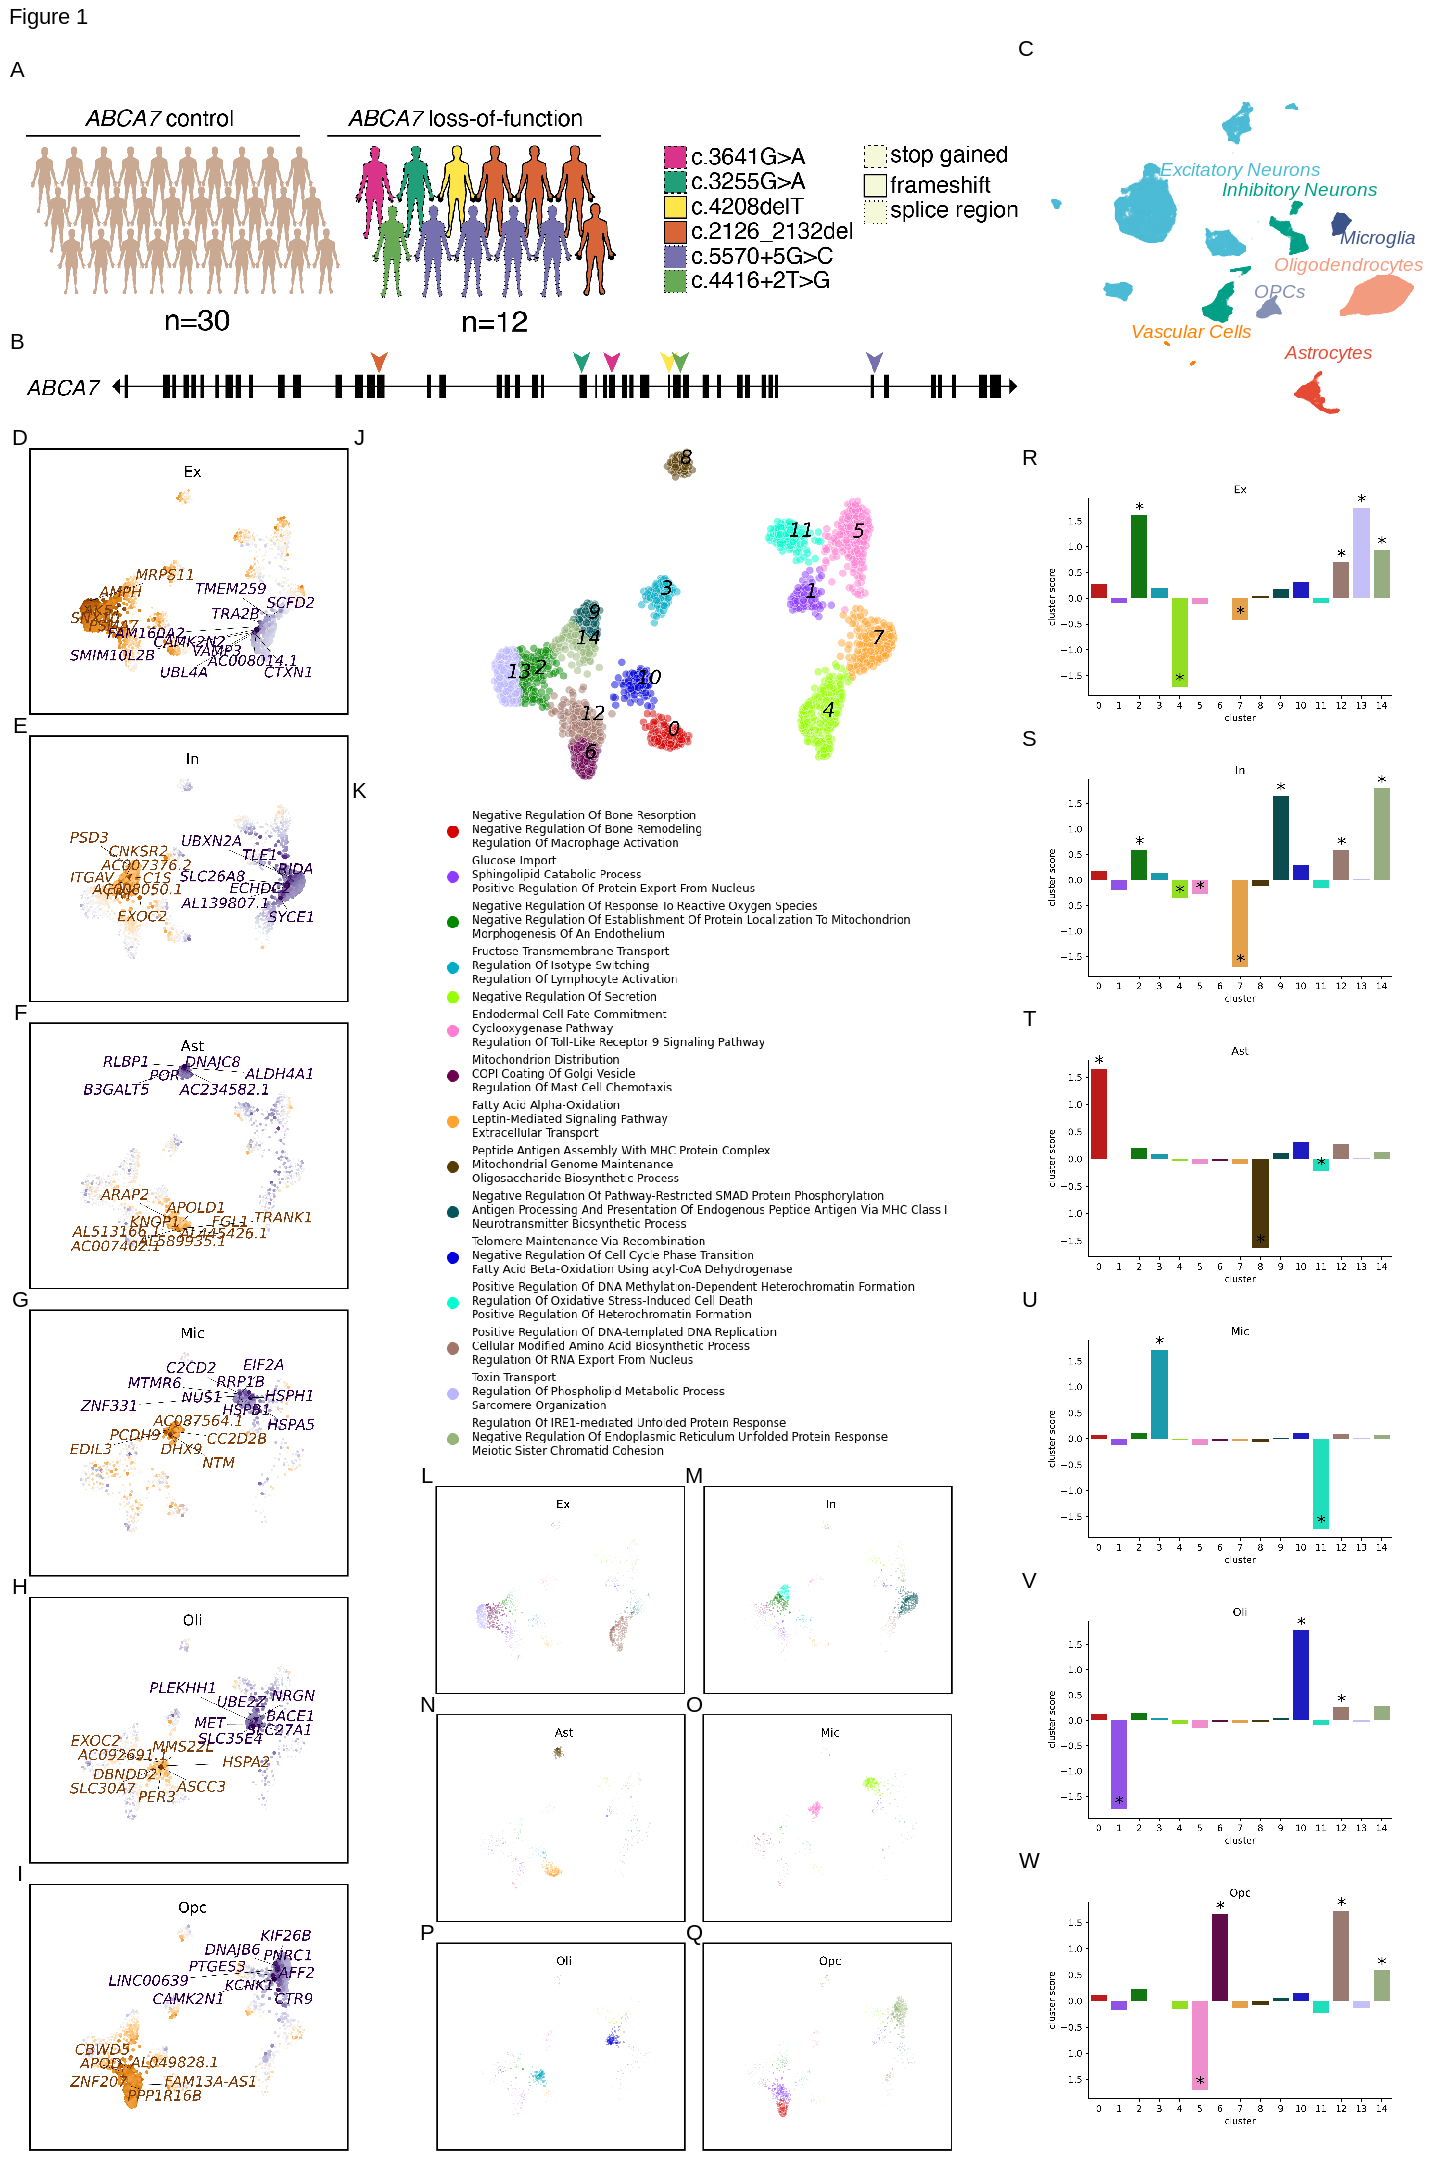

In [158]:

row1 = ((cohort_cartoon / abca7_gene) | (cells_plot)) + plot_layout(widths=c(2,.8))
row2 = (ex_u / in_u / ast_u / mic_u / oli_u / opc_u)
bar = ex_b / in_b / ast_b / mic_b / oli_b / opc_b

options(repr.plot.width=12, repr.plot.height=18)
fig1 = (row1/((row2|((overview/legend/row3)+plot_layout(heights=c(.5,1,1)))|bar)+plot_layout(widths=c(1,2,1.2)))) + plot_layout(heights=c(1,5))+ plot_annotation(tag_levels = 'A', title='Figure 1')

pdf('./pdf_figures/Figure_1.pdf', width=12, height=18)
fig1
dev.off()
fig1

In [6]:
all_paths = readRDS('../ABCA7lof/processed_data/single_cell_data//analysis_input_data_nov10.rds')

In [1]:
degs = readRDS('./processed_data/single_cell/pseudobulk_degs.rds')

In [4]:
degs$degs_all$Ex$res['JAK2',]

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
JAK2,0.251006,6.917032,2.28365,0.03021615,0.9902329,-3.554326


In [3]:
all_data = readRDS('./processed_data/single_cell/stats_input_data.rds')

In [11]:
df = as.data.frame(unique(unname(unlist(all_data$expressed10))))
colnames(df)= 'ten_percent_expressed'
write.csv(df, './processed_data/single_cell/10_percent_expressed.csv')

<u>**Figure 2**</u>
<a name="F3"></a>

In [ ]:
### Show ABCA7 projection A
### show detection rate B
### Show LE clusters colored by cluster C
### Shoe LE clusters colored by fold change D
### Show cluster summary score & pathway name E

In [159]:
clusters = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex.png')))
scores = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_scores.png')))
names = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names0.png')))
names1 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names1.png')))
names2 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names2.png')))
names3 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names3.png')))
names4 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names4.png')))
names5 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names5.png')))
names6 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names6.png')))
names7 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names7.png')))
names8 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names8.png')))
names9 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names9.png')))

In [160]:
bars = image_ggplot((image_read('./pdf_figures/ex_clust_bars.png')))

In [161]:
options(repr.plot.width=10, repr.plot.height=1.4)
row = (((names9 | names4) / (names7 |names8) /(names3|names5)/ (names | names2) / (names6|names1)))#/bars) + plot_layout(heights=c(1,1,1,1,1,1,2))

In [162]:
coords = read.csv('../ABCA7lof//processed_data//for_plotting/umap_coords.csv', row.names=1)

abca7_expression = plot_coords_by_gene(coords, 'x', 'y', 'ABCA7', 'node_centrality', low='white', high='seagreen')



In [163]:
all_data = readRDS('./processed_data/single_cell/stats_input_data.rds')

In [164]:
x = all_data$det.rate.celltype['ABCA7',]
x = x[order(-1*x)]
x = as.data.frame(x)
x$cell = factor(rownames(x), levels = rownames(x))

p<-ggplot(data=x, aes(x=cell, y=x, fill = cell)) +
  geom_bar(stat="identity") + theme_classic() + scale_fill_manual(values = colors[x$cell]) + ylab('fraction of cells where counts > 0') + xlab('')


png 
  2

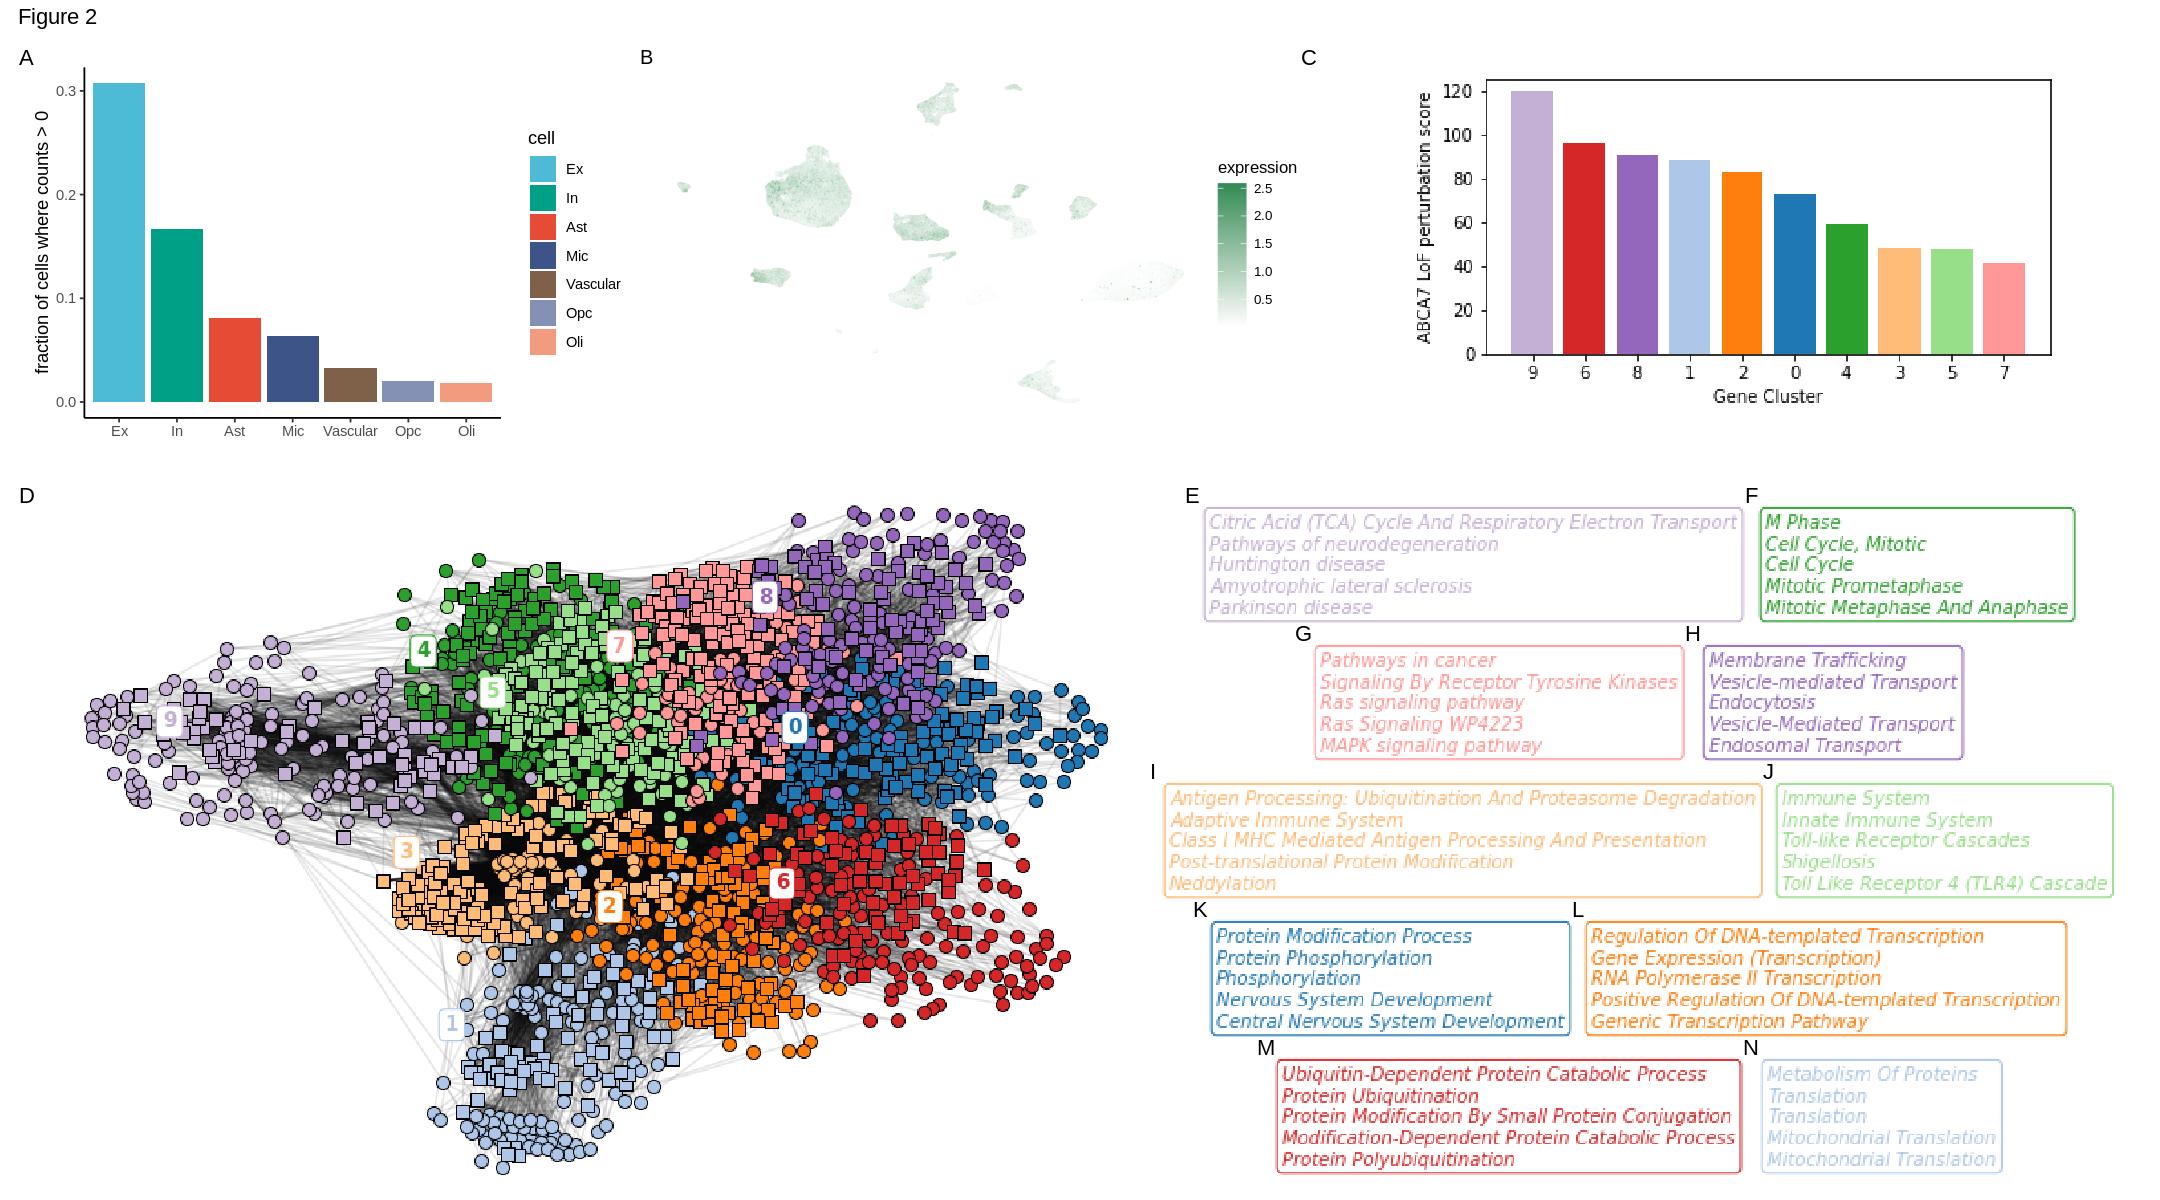

In [168]:
options(repr.plot.width=18, repr.plot.height=10)

fig2 = (((p|abca7_expression|bars)+plot_layout(widths=c(1.5,2,3)))/(clusters | row)) + plot_layout(heights=c(2,4))+ plot_annotation(tag_levels = 'A', title='Figure 2')
fig2 

pdf('./pdf_figures/Figure_2.pdf', width=18, height=10)
fig2
dev.off()

<u>**Figure 3**</u>
<a name="F3"></a>

In [285]:
bars = image_ggplot(image_trim(image_read('./pdf_figures/9_bars.png')))
n1 = image_ggplot(image_trim(image_read('./pdf_figures/9_names_0.png')))
n2 = image_ggplot(image_trim(image_read('./pdf_figures/9_names_1.png')))
n3 = image_ggplot(image_trim(image_read('./pdf_figures/9_names_2.png')))
clust = image_ggplot(image_trim(image_read('./pdf_figures/9_subcluster.png')))

In [286]:
rox_im = image_ggplot(image_trim(image_read_pdf('../ABCA7lof//svgs/ngn2_cellrox.pdf')))
mito_im = image_ggplot(image_trim(image_read_pdf('../ABCA7lof//svgs/ngn2_mitohealth.pdf')))
gene = image_ggplot(image_trim(image_read_pdf('../ABCA7lof//svgs/ngn2_gene.pdf')))
overview = image_ggplot(image_trim(image_read_pdf('../ABCA7lof//svgs/ngn2-overview.pdf')))

In [287]:
row0 = (n1/n2/n3/bars) + plot_layout(heights=c(1,1,1,2))

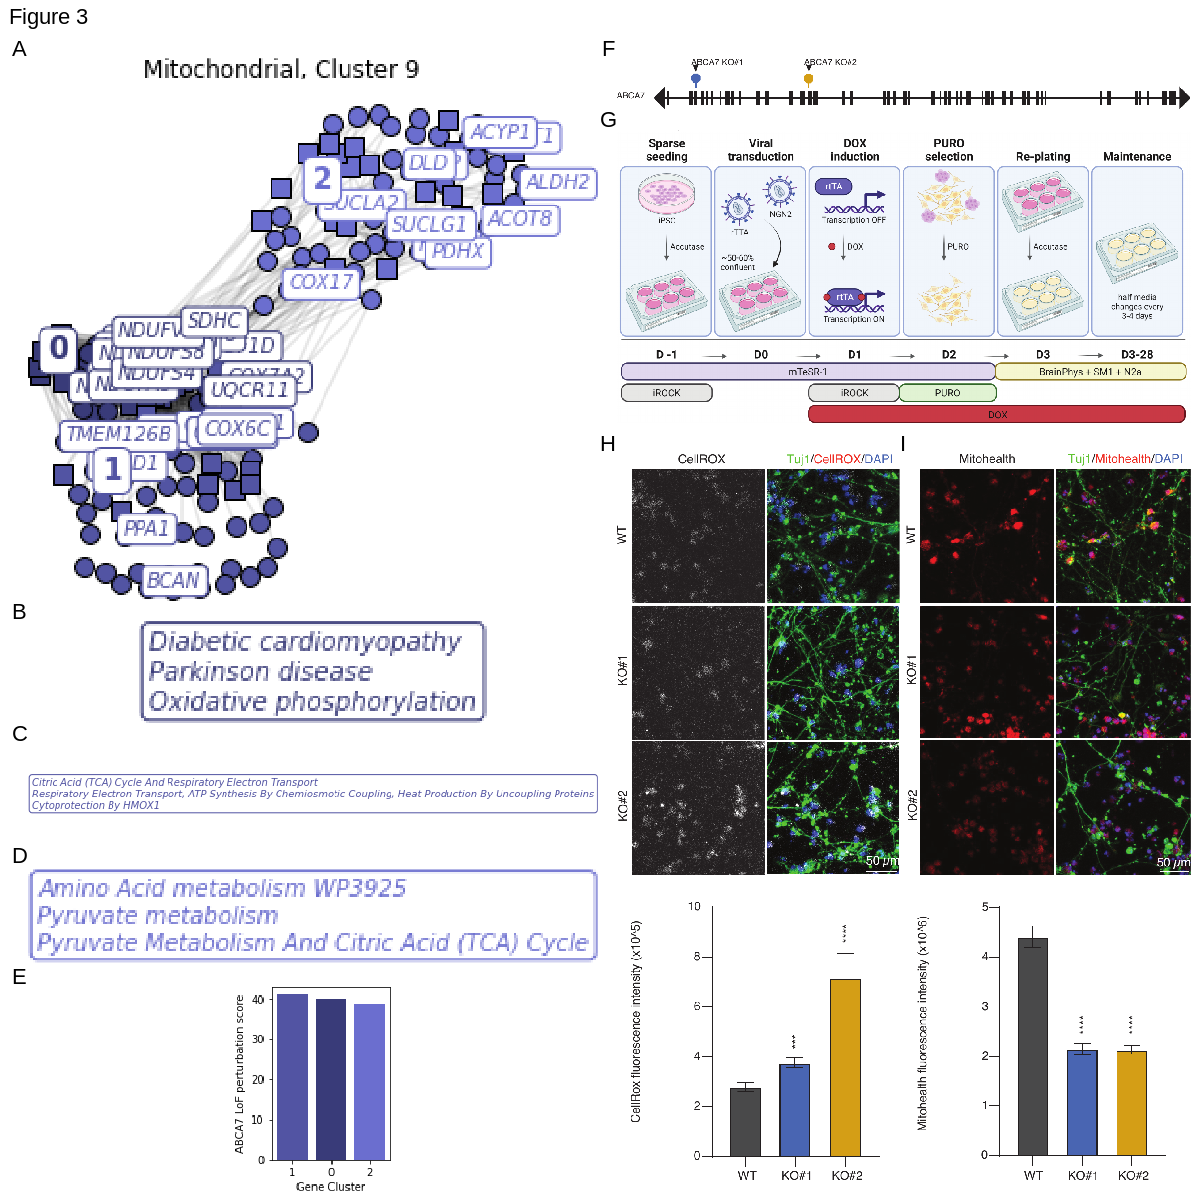

In [288]:
options(repr.plot.width=10, repr.plot.height=10)

fig3 = ((clust/row0) | ((gene/overview) / (rox_im | mito_im))) + plot_annotation(tag_levels = 'A', title='Figure 3')
fig3 

In [293]:
pdf('./pdf_figures/Figure_3.pdf', width=10, height=10)
fig3
dev.off()

png 
  2

<u>**Figure 4**</u>
<a name="F4"></a>

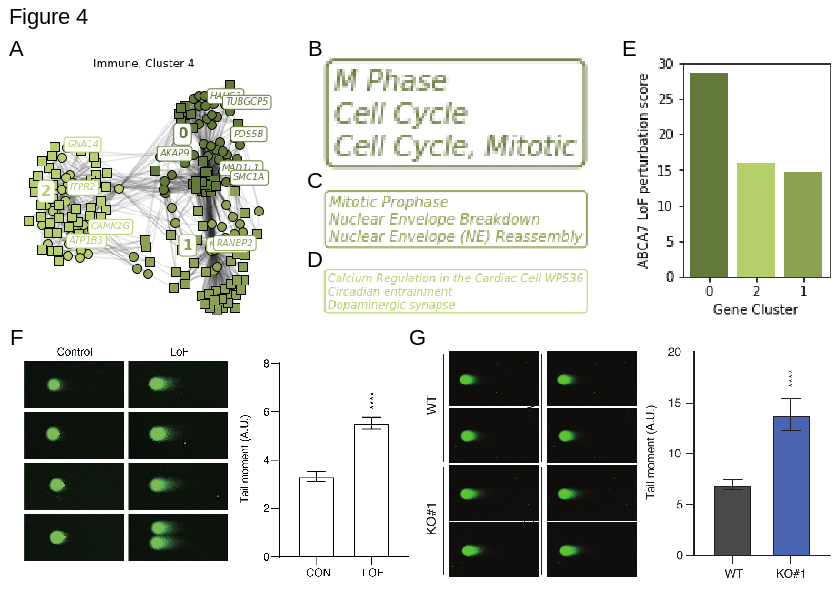

In [292]:
bar = image_ggplot(image_trim(image_read('./pdf_figures/4_bars.png')))

n1 = image_ggplot(image_trim(image_read('./pdf_figures/4_names_0.png')))
n2 = image_ggplot(image_trim(image_read('./pdf_figures/4_names_1.png')))
n3 = image_ggplot(image_trim(image_read('./pdf_figures/4_names_2.png')))
clust = image_ggplot(image_trim(image_read('./pdf_figures/4_subcluster.png')))

comet_pm = image_ggplot(image_trim(image_read('../ABCA7lof//svgs/neutral_comet_pm.png')))
comet_ng = image_ggplot(image_trim(image_read_pdf('../ABCA7lof//svgs/ngn2_comet.pdf')))

options(repr.plot.width=7, repr.plot.height=5)

fig4 = (clust | (n1/n2/n3)|bar)/(comet_pm | comet_ng)+ plot_annotation(tag_levels = 'A', title='Figure 4')
fig4

In [294]:
pdf('./pdf_figures/Figure_4.pdf', width=7, height=5)
fig4
dev.off()

png 
  2

<u>**Figure 5**</u>
<a name="F5"></a>

In [295]:
bar = image_ggplot(image_trim(image_read('./pdf_figures/5_bars.png')))

n1 = image_ggplot(image_trim(image_read('./pdf_figures/5_names_0.png')))
n2 = image_ggplot(image_trim(image_read('./pdf_figures/5_names_1.png')))
n3 = image_ggplot(image_trim(image_read('./pdf_figures/5_names_2.png')))
clust = image_ggplot(image_trim(image_read('./pdf_figures/5_subcluster.png')))

p65_pm = image_ggplot(image_trim(image_read('../ABCA7lof//svgs/p65_pm.png')))
p65_ng = image_ggplot(image_trim(image_read_pdf('../ABCA7lof//svgs/ngn2_p65.pdf')))


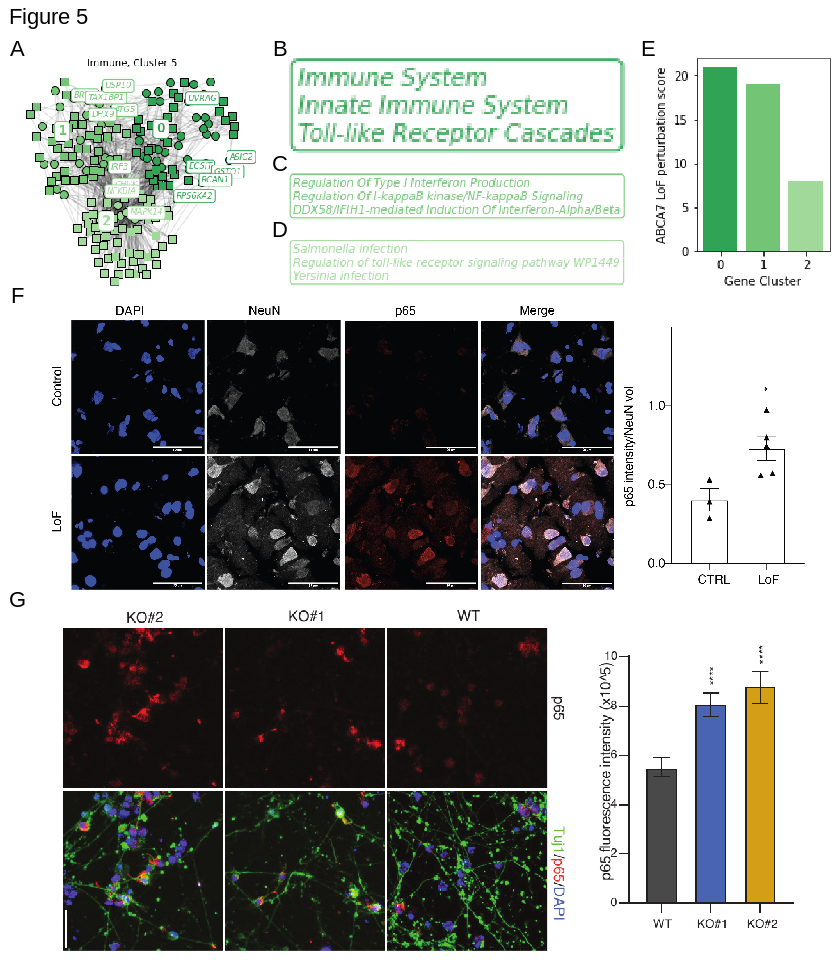

In [296]:
options(repr.plot.width=7, repr.plot.height=8)

fig5 = (clust | (n1/n2/n3)|bar)/p65_pm/p65_ng  + plot_layout(heights=c(2,2.5,3))+ plot_annotation(tag_levels = 'A', title='Figure 5')
fig5

In [297]:
pdf('./pdf_figures/Figure_5.pdf', width=7, height=8)
fig5
dev.off()

png 
  2

<u>**Figure 6**</u>
<a name="F6"></a>